# Example of masks

## Creating an instance 

In [1]:
from diffractio import np, plt, sp
from diffractio import degrees, mm, um
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_sources_X import Scalar_source_X

from numpy import loadtxt

## mask from two functions

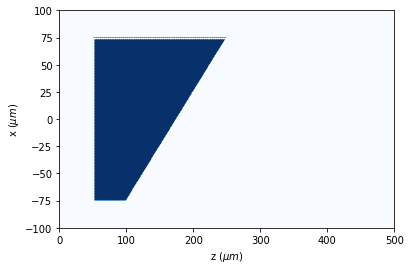

In [2]:
x0 = np.linspace(-100 * um, 100 * um, 512)
z0 = np.linspace(0 * um, 500 * um, 512)
wavelength = 0.6238 * um

f1 = '50 * um'
f2 = "175*um+np.tan(45*degrees)*(self.X-0*um)"
z_sides = (-75 * um, 75 * um)
v_globals = {'um': 1, 'np': np}

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.mask_from_function(r0=(0, 0),
                      refractive_index=1.5,
                      f1=f1,
                      f2=f2,
                      z_sides=z_sides,
                      angle=0 * degrees,
                      v_globals=v_globals)

t1.draw_refractive_index()


## mask from surfaces defined in file

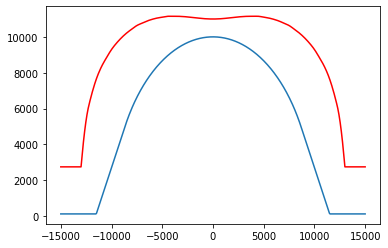

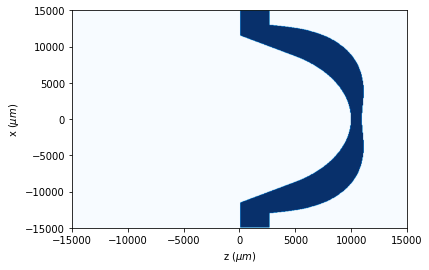

In [3]:
x = np.linspace(-15 * mm, 15 * mm, 512)
z = np.linspace(-15 * mm, 15 * mm, 512)
wavelength = 0.6328 * um

t1 = Scalar_mask_XZ(x, z, wavelength)

profile1 = loadtxt('profile1.txt')
profile2 = loadtxt('profile2.txt')

profile1[:, 1] = np.abs(profile1[:, 1])
profile2[:, 1] = np.abs(profile2[:, 1])
t1.mask_from_array(
    r0=(0 * um, 0 * um),
    refractive_index=2,
    array1=profile2 * 1000,  # propasar a micras
    array2=profile1 * 1000,  # pasar a micras
    x_sides=(-15 * mm, 15 * mm),
    angle=0 * degrees,
    v_globals={},
    interp_kind='quadratic',
    has_draw=True)

t1.draw_refractive_index(draw_borders=False)


## mask from several surfaces

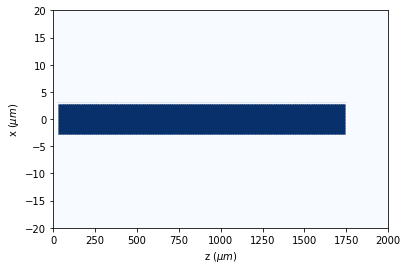

In [4]:
x0 = np.linspace(-20 * um, 20 * um, 512)
z0 = np.linspace(0 * um, 2000 * um, 512)
wavelength = 2 * um

r0 = (0, 0)
refractive_index = 4
Fs = ['Xrot<3*um', 'Xrot>-3*um', 'Zrot>25*um', 'Zrot<1750*um']
t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)

t1.object_by_surfaces(r0,
                      refractive_index,
                      Fs,
                      angle=0 * degrees,
                      v_globals={})

t1.draw_refractive_index(draw_borders=True)


## refractive index from functions

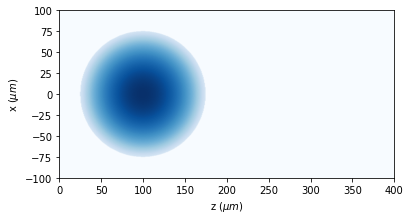

In [5]:
x0 = np.linspace(-100 * um, 100 * um, 512)
z0 = np.linspace(0 * um, 400 * um, 512)

wavelength = 0.5 * um

t0 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1.0)

pn = dict(n_out=1.5, n_center=4, cx=0 * um, cz=100 * um, radius=75 * um)

center = (pn['cx'], pn['cz'])
radius = pn['radius']
# ref_index = '2*(((X-0)**2+(Z-300)**2)/75**2-0)'
ref_index = "{p[n_out]}+({p[n_center]}-{p[n_out]})*(1-((X-{p[cx]})**2+(Z-{p[cz]})**2)/{p[radius]}**2)".format(
    p=pn)

t0.sphere(r0=center,
          radius=(radius, radius),
          refractive_index=ref_index,
          angle=0)

t0.draw_refractive_index(draw_borders=False, scale='scaled')


## xz mask from a x mask

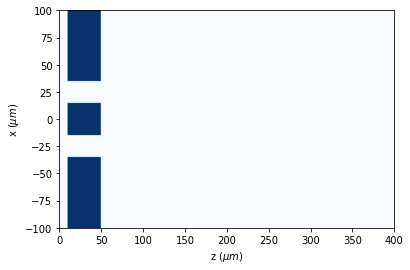

In [6]:
x0 = np.linspace(-100 * um, 100 * um, 512)
z0 = np.linspace(0 * um, 400 * um, 512)
wavelength = .55 * um

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.double_slit(x0=0, size=20 * um, separation=50 * um)

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)
z0 = 10 * um
z1 = 50 * um

v_globals = dict(z0=z0, z1=z1)

t1.extrude_mask(t=t0, z0=z0, z1=z1, refractive_index=1.5, v_globals=v_globals)

t1.draw_refractive_index(draw_borders=False)


## xz mask from a xy mask

There are many masks defined in the XY frame. We can use them using the 'refractive_index_from_scalar_mask_XY' method.

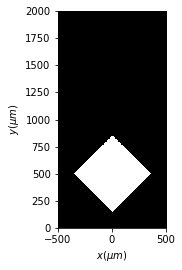

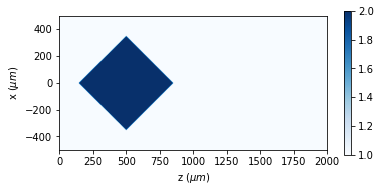

In [7]:
from diffractio.scalar_masks_XY import Scalar_mask_XY

x = np.linspace(-500*um, 500*um, 256)
y = z = np.linspace(0*um, 2*mm, 512)

wavelength = 0.6328*um

mask_xy = Scalar_mask_XY(x,y, wavelength)
mask_xy.square(r0=(0, 500*um), size=500*um, angle=45*degrees)
mask_xy.draw()

mask_xz = Scalar_mask_XZ(x,z, wavelength=wavelength, n_background=1)
mask_xz.refractive_index_from_scalar_mask_XY(mask_xy,2+0.02j)
mask_xz.draw_refractive_index(draw_borders=False, scale='scaled', colorbar_kind='vertical')

## Variable refractive index

### z direction

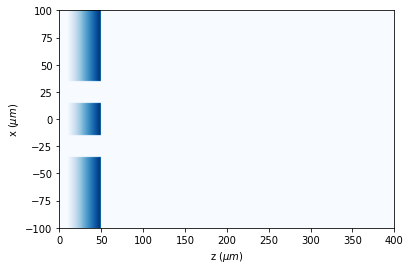

In [8]:
# In this example the variation is in z

x0 = np.linspace(-100 * um, 100 * um, 512)
z0 = np.linspace(0 * um, 400 * um, 512)
wavelength = .55 * um

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.double_slit(x0=0, size=20 * um, separation=50 * um)

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)
z0 = 10 * um
z1 = 50 * um
v_globals = dict(z0=z0, z1=z1)
t1.extrude_mask(t=t0,
                z0=z0,
                z1=z1,
                refractive_index='1+0.25*(z-z0)/(z1-z0)',
                v_globals=v_globals)
t1.draw_refractive_index(draw_borders=False, )


### x direction

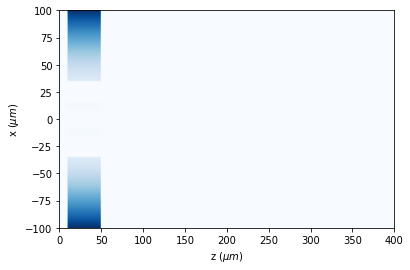

In [9]:
x0 = np.linspace(-100 * um, 100 * um, 512)
z0 = np.linspace(0 * um, 400 * um, 512)
wavelength = .5 * um

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.double_slit(x0=0, size=20 * um, separation=50 * um)

z_min = 10 * um
z_max = 50 * um
v_globals = dict(np=np)
t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)
t1.extrude_mask(t=t0,
                z0=z_min,
                z1=z_max,
                refractive_index='1+0.25*np.abs(x/200)**2',
                v_globals=v_globals)
t1.draw_refractive_index(draw_borders=False)


### discretize_refractive_index

Dx=0.391389432485326


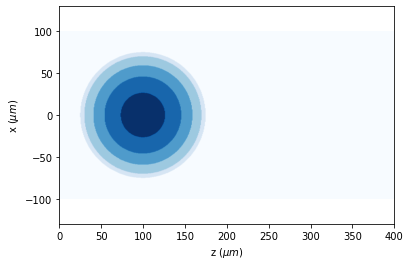

In [10]:
x0 = np.linspace(-100 * um, 100 * um, 512)
print("Dx={}".format(x0[1] - x0[0]))
z0 = np.linspace(0 * um, 400 * um, 512)
wavelength = 50 * um

t0 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1.0)

pn = dict(n_out=1.5, n_center=4, cx=0 * um, cz=100 * um, radius=75 * um)

center = (pn['cx'], pn['cz'])
radius = pn['radius']
# ref_index = '2*(((X-0)**2+(Z-300)**2)/75**2-0)'
ref_index = "{p[n_out]}+({p[n_center]}-{p[n_out]})*(1-((X-{p[cx]})**2+(Z-{p[cz]})**2)/{p[radius]}**2)".format(
    p=pn)

t0.sphere(r0=center,
          radius=(radius, radius),
          refractive_index=ref_index,
          angle=0)

t0.discretize_refractive_index(num_layers=5)

t0.draw_refractive_index(draw_borders=False, scale='equal')


## add_masks
Complex structures can be performed by adding different masks.

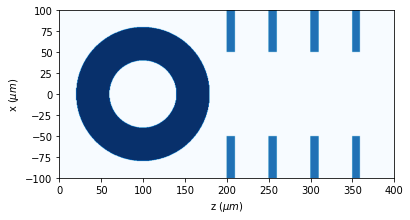

In [11]:
x0 = np.linspace(-100 * um, 100 * um, 512)
z0 = np.linspace(0 * um, 400 * um, 512)
wavelength = 2 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)

t1.sphere(r0=(0, 100 * um),
          radius=(80 * um, 80 * um),
          refractive_index=2.5,
          angle=0)

t1.sphere(r0=(0, 100 * um),
          radius=(40 * um, 40 * um),
          refractive_index=1,
          angle=0)

for pos_slit in [200, 250, 300, 350]:
    t1.slit(r0=(0 * um, pos_slit * um),
            aperture=100 * um,
            depth=10 * um,
            refractive_index=1.5 - 1.5j,
            refractive_index_center='',
            angle=0 * degrees)

t1.draw_refractive_index(draw_borders=False, scale='scaled')


## mask from an image

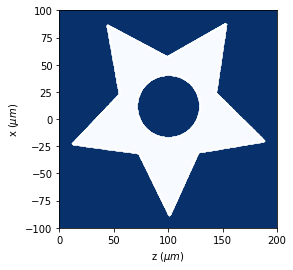

In [12]:
x0 = np.linspace(-100 * um, 100 * um, 1024)
z0 = np.linspace(0 * um, 200 * um, 1024)
wavelength = 0.6238 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

filename = "star_hole.png"
t1.image(filename=filename, n_max=2, n_min=1, angle=0 * degrees, invert=False)
t1.draw_refractive_index(scale='scaled')


# Definite masks

## semi plane

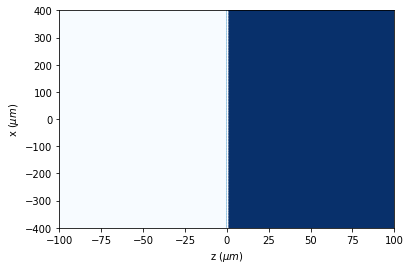

In [13]:
x0 = np.linspace(-400 * um, 400 * um, 512)
z0 = np.linspace(-100 * um, 100 * um, 512)
wavelength = .5 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.semi_plane(r0=(0, 0),
              refractive_index=2,
              angle=0 * degrees,
              rotation_point=None)
t1.draw_refractive_index()


## layer

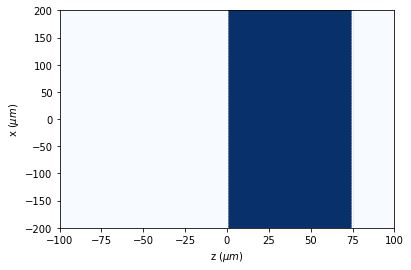

In [14]:
x0 = np.linspace(-200 * um, 200 * um, 512)
z0 = np.linspace(-100 * um, 100 * um, 512)
wavelength = .5 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.layer(r0=(50, 0),
         depth=75 * um,
         refractive_index=2,
         angle=0 * degrees,
         rotation_point=None)
t1.draw_refractive_index()


## rectangle

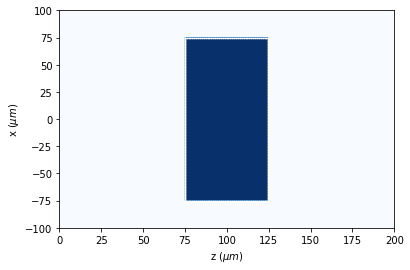

In [15]:
x0 = np.linspace(-100 * um, 100 * um, 512)
z0 = np.linspace(0 * um, 200 * um, 512)
wavelength = 0.6238 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.rectangle(r0=(0 * um, 100 * um),
             size=(150 * um, 50 * um),
             angle=0 * degrees,
             refractive_index=1.5)
t1.draw_refractive_index()


## slit

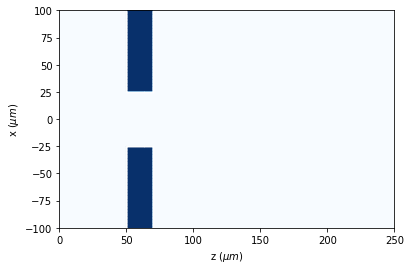

In [16]:
x0 = np.linspace(-100 * um, 100 * um, 512 * 4)
z0 = np.linspace(0 * um, 250 * um, 512 * 4)
wavelength = 0.6238 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

t1.slit(r0=(0 * um, 50 * um),
        aperture=50 * um,
        depth=20 * um,
        refractive_index=1.5 + 1j,
        refractive_index_center='',
        angle=0 * degrees)

t1.draw_refractive_index()


## sphere or ellipsoid

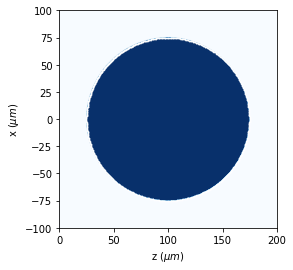

In [17]:
x0 = np.linspace(-100 * um, 100 * um, 512)
z0 = np.linspace(0 * um, 200 * um, 512)
wavelength = 0.6238 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

t1.sphere(r0=(0, 100 * um),
          radius=(75 * um, 75 * um),
          refractive_index=1.5,
          angle=0 * degrees)

t1.draw_refractive_index(scale='scaled')


## semi sphere

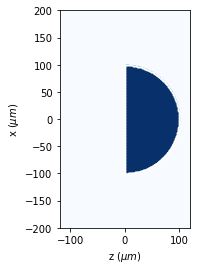

In [18]:
x0 = np.linspace(-200 * um, 200 * um, 512)
z0 = np.linspace(-120 * um, 120 * um, 512)
wavelength = .5 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.semi_sphere(r0=(0, 0),
               radius=(100, 100),
               refractive_index=2,
               angle=0 * degrees)

t1.draw_refractive_index(draw_borders=True, min_incr=0.01, scale='scaled')


## wedge

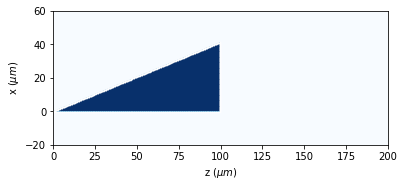

In [19]:
x0 = np.linspace(-20 * um, 60 * um, 512)
z0 = np.linspace(0 * um, 200 * um, 512)
wavelength = 0.6238 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

t1.wedge(r0=(0, 0),
         length=100 * um,
         refractive_index=1.5,
         angle_wedge=22.5 * degrees,
         angle=0 * degrees,
         rotation_point=None)
t1.draw_refractive_index(scale='scaled')


## prism

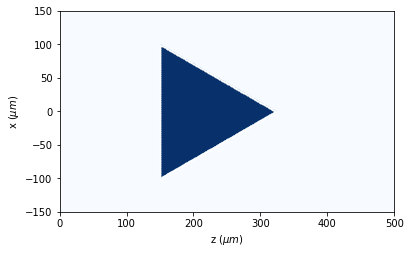

In [20]:
x0 = np.linspace(-150 * um, 150 * um, 512)
z0 = np.linspace(0 * um, 500 * um, 4096)
wavelength = 2 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.prism(r0=(100 * um, 150 * um),
         length=200 * um,
         refractive_index=2,
         angle_prism=60 * degrees,
         angle=90 * degrees)
t1.draw_refractive_index(scale='scaled')


## biprism

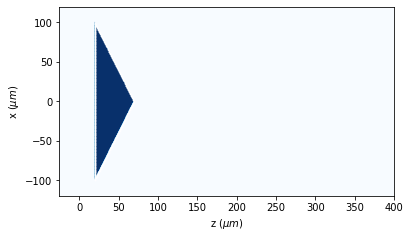

In [21]:
x0 = np.linspace(-120 * um, 120 * um, 512)
z0 = np.linspace(-25 * um, 400 * um, 4096)
wavelength = .5 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.biprism(r0=(0, 20 * um),
           length=200 * um,
           height=50 * um,
           refractive_index=1.5,
           angle=0)
t1.draw_refractive_index(draw_borders=True, scale='scaled')


## Ronchi grating

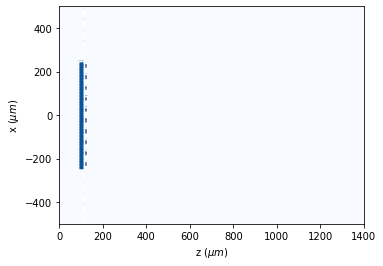

In [22]:
x0 = np.linspace(-500 * um, 500 * um, 512)
z0 = np.linspace(0 * um, 1400 * um, 512)
wavelength = 0.5 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

t1.ronchi_grating(period=50 * um,
                  fill_factor=.5,
                  length=500 * um,
                  height=20 * um,
                  r0=(0 * um, 100 * um),
                  Dx=2 * um,
                  refractive_index=1.5 + 0.5j,
                  heigth_substrate=25 * um,
                  refractive_index_substrate=1.5,
                  angle=0 * degrees)

t1.draw_refractive_index(scale='scaled')


## grating with substrate

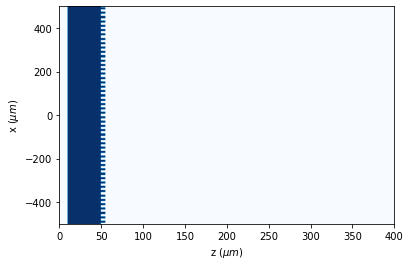

In [23]:
x0 = np.linspace(-500 * um, 500 * um, 512)
z0 = np.linspace(0 * um, 400 * um, 512)
wavelength = .55 * um

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.slit(x0=0, size=0 * um)

t1 = Scalar_mask_X(x=x0, wavelength=wavelength)
t1.ronchi_grating(period=20 * um, x0=0 * um, fill_factor=0.5)

t2 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)

t2.extrude_mask(t=t0, z0=10 * um, z1=50 * um, refractive_index=1.5)
t2.extrude_mask(t=t1, z0=50 * um, z1=55.5 * um, refractive_index=1.5)

t2.draw_refractive_index(draw_borders=False)


## sine grating

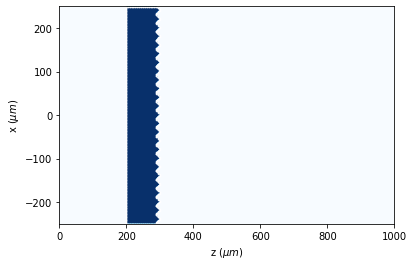

In [24]:
x0 = np.linspace(-250 * um, 250 * um, 512)
z0 = np.linspace(0 * um, 1000 * um, 512)
wavelength = 0.6238 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

t1.sine_grating(period=20 * um,
                heigth_sine=10 * um,
                heigth_substrate=100 * um,
                r0=(0 * um, 200 * um),
                length=500 * um,
                Dx=2 * um,
                refractive_index=1.5,
                angle=0 * degrees)

t1.draw_refractive_index()


## probe

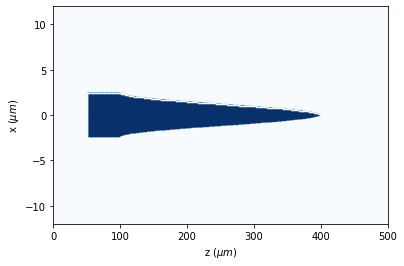

In [25]:
x0 = np.linspace(-12 * um, 12 * um, 512)
z0 = np.linspace(0 * um, 500 * um, 512)
wavelength = .6 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.probe(r0=(0, 50 * um),
         base=5 * um,
         length=300 * um,
         refractive_index=1.5,
         angle=0 * degrees)

t1.draw_refractive_index()


## convergent plane lens

focus distance f=12000.0 um


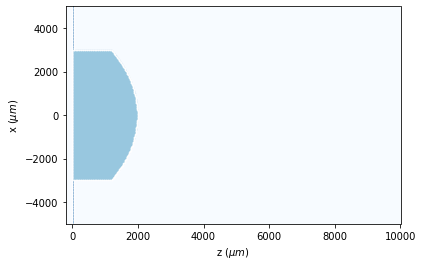

In [26]:
x0 = np.linspace(-5 * mm, 5 * mm, 512)
z0 = np.linspace(-200 * um, 10 * mm, 512)
wavelength = 0.6238 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

focal, _ = t1.lens_plane_convergent(r0=(0, 0),
                                    aperture=6 * mm,
                                    radius=6 * mm,
                                    thickness=2 * mm,
                                    refractive_index=1.5,
                                    angle=0 * degrees,
                                    mask=(50 * um, 1 + 2.05j))
print("focus distance f={} um".format(focal))

t1.draw_refractive_index()


## convergent lens

focus distance f=3368.42 um


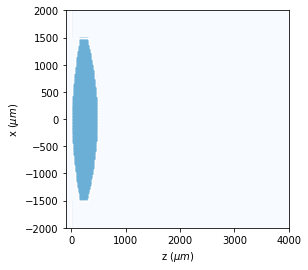

In [27]:
x0 = np.linspace(-2000 * um, 2000 * um, 512)
z0 = np.linspace(-100 * um, 4 * mm, 512)
wavelength = 0.6238 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

focal, _ = t1.lens_convergent(r0=(0, 0),
                              aperture=3 * mm,
                              radius=(8 * mm, -6 * mm),
                              thickness=500 * um,
                              refractive_index=2,
                              angle=0 * degrees,
                              mask=(10 * um, 3 + 0.05j))
print("focus distance f={:2.2f} um".format(focal))

t1.draw_refractive_index(scale='scaled')


## divergent plane lens

focus distance f=1500.0 um


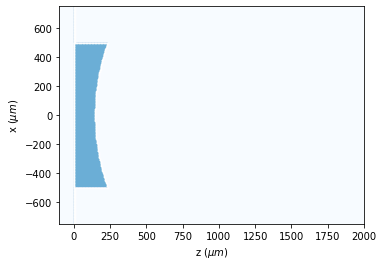

In [28]:
x0 = np.linspace(-750 * um, 750 * um, 512)
z0 = np.linspace(-100 * um, 2000 * um, 512)
wavelength = 0.6238 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

focal, _ = t1.lens_plane_divergent(r0=(0, 0),
                                   aperture=1000 * um,
                                   radius=1500 * um,
                                   thickness=150 * um,
                                   refractive_index=2,
                                   angle=0 * degrees,
                                   mask=(10 * um, 3 + 0.05j))
print("focus distance f={} um".format(focal))

t1.draw_refractive_index(scale='scaled')


## divergent lens

focus distance f=-154.28571428571428 um


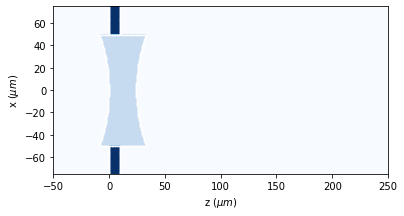

In [29]:
x0 = np.linspace(-75 * um, 75 * um, 512)
z0 = np.linspace(-50 * um, 250 * um, 512)
wavelength = 0.6238 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

focal, _ = t1.lens_divergent(r0=(0, 0),
                             aperture=100 * um,
                             radius=(-150 * um, 150 * um),
                             thickness=25 * um,
                             refractive_index=1.5,
                             angle=0 * degrees,
                             mask=(10 * um, 3 + 0.05j))
print("focus distance f={} um".format(focal))
t1.draw_refractive_index(scale='scaled')


## rough surface

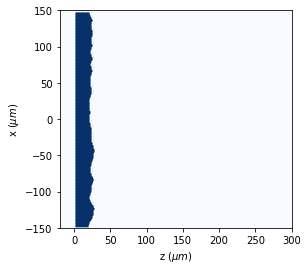

In [30]:
x0 = np.linspace(-150 * um, 150 * um, 512)
z0 = np.linspace(-20 * um, 300 * um, 512)
wavelength = 0.6238 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.rough_sheet(r0=(0 * um, 0 * um),
               size=(300 * um, 25 * um),
               t=10 * um,
               s=10 * um,
               refractive_index=1.5,
               angle=0,
               rotation_point=None)
t1.draw_refractive_index(scale='scaled')
